In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dummy_data.csv')
X = df.drop(['customerid','churn_Yes'], axis=1)
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
from sklearn.cluster import DBSCAN

ss = StandardScaler()
X = ss.fit_transform(X)
dbscan=DBSCAN(eps=.5,min_samples=4)

In [4]:
model = dbscan.fit(X)
labels = model.labels_

In [5]:
# -1 are the noisy points.

labels[:50]

array([-1, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1,  5,
       -1, -1,  6, -1, -1, -1, -1, -1,  7, -1, -1, -1, -1,  8, -1, -1],
      dtype=int64)

In [6]:

#Identifying the points which makes up our core points
# This considers everything as False.
from sklearn import metrics

sample_cores = np.zeros_like(labels,dtype = bool)
sample_cores

array([False, False, False, ..., False, False, False])

In [7]:
# This shows which indexes are set to True. 


sample_cores[dbscan.core_sample_indices_]=True

In [8]:
# calculating the number of clusters

n_clusters = len(set(labels))- (1 if -1 in labels else 0)


In [9]:
n_clusters

170

In [10]:
# Average mean of points are indicted as noisy vs cluster.

print(metrics.silhouette_score(X, labels))

-0.1734853291273933


In [11]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.scatter(X[:,1], X[:,5],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    print(X)

[[-1.27744458 -1.16032292 -0.99261052 ... -0.52504733  1.40641839
  -0.54480692]
 [ 0.06632742 -0.25962894 -0.17216471 ... -0.52504733 -0.71102597
   1.83551265]
 [-1.23672422 -0.36266036 -0.9580659  ... -0.52504733 -0.71102597
   1.83551265]
 ...
 [-0.87024095 -1.1686319  -0.85293201 ... -0.52504733  1.40641839
  -0.54480692]
 [-1.15528349  0.32033821 -0.87051315 ... -0.52504733 -0.71102597
   1.83551265]
 [ 1.36937906  1.35896134  2.01389665 ... -0.52504733 -0.71102597
  -0.54480692]]


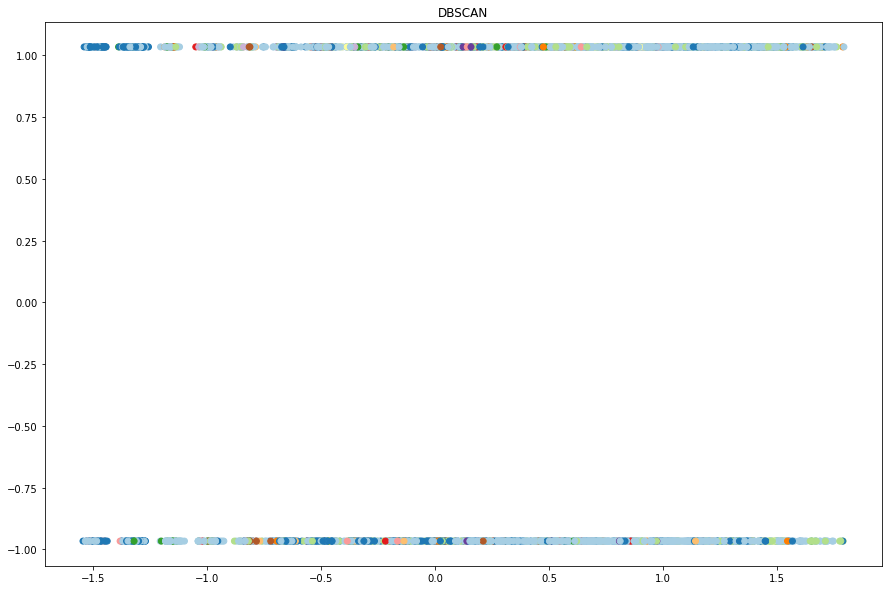

In [12]:
dbscan(X,3,2)